<a href="https://colab.research.google.com/github/joomj2000/SKT_FLY_AI/blob/main/2%EC%9D%BC%EC%B0%A8_%EC%9B%8C%EB%93%9C%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C_%EC%A3%BC%EB%AF%BC%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install Matplotlib
import matplotlib.pyplot as plt

In [ ]:
!pip install konlpy
from konlpy.tag import Okt

In [ ]:
# 한글 사용하기

#설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf #캐쉬삭제

!apt-get update -qq
!apt-get install fonts-nanum* -qq #설치되었는지 확인


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 46 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 폰트의 속성 지정 , 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)

In [ ]:
# URL 설정 및 요청 보내기
import requests
from bs4 import BeautifulSoup as bs
url = 'https://m.search.naver.com/search.naver?where=m&sm=mtb_etc&mra=bkEw&pkid=68&os=2085555&qvt=0&query=%EC%98%81%ED%99%94%20%EC%A3%BC%ED%86%A0%ED%94%BC%EC%95%84%20%EA%B4%80%EB%9E%8C%ED%8F%89#movie-rating'
res = requests.get(url)
text=''


soup = bs(res.content, 'html.parser')

# desc _text 클래스를 가진 요소 선택
reviews = soup.select('.desc._text')

# 관람평을 리스트에 저장
review_list = [review.text.strip() for review in reviews]

# 관람평을 text파일로 만들기
for review in review_list:
    text+=review



In [ ]:
print(text)

동물들의 도시 '주토피아'를 배경으로, 차별과 편견의 벽을 넘어 경찰이 된 토끼 경찰 주디가 도시를 위협하는 악당을 물리치는 이야기. 애니메이션치곤 드물게 범죄영화 장르에 속해 있다. 초등학교 3학년 이상 정도는 되어야 제대로 즐길 수 있는 내용이다. 수많은 동물 캐릭터들이 등장하는데, 압권은 나무늘보. 잠깐 등장함에도 강력한 존재감을 드러내는 '신 스틸러'다.태어날 때부터 정해지는 건 없다볼거리+귀여움+감동의 3박자를 다 갖췄다차이와 편견에 대한 디즈니의 흥미로운 우화현실의 문제를 더욱 또렷하게 드러내는 잘 만든 우화의 탄력동물들의 도시 '주토피아'를 배경으로, 차별과 편견의 벽을 넘어 경찰이 된 토끼 경찰 주디가 도시를 위협하는 악당을 물리치는 이야기. 애니메이션치곤 드물게 범죄영화 장르에 속해 있다. 초등학교 3학년 이상 정도는 되어야 제대로 즐길 수 있는 내용이다. 수많은 동물 캐릭터들이 등장하는데, 압권은 나무늘보. 잠깐 등장함에도 강력한 존재감을 드러내는 '신 스틸러'다.태어날 때부터 정해지는 건 없다볼거리+귀여움+감동의 3박자를 다 갖췄다차이와 편견에 대한 디즈니의 흥미로운 우화현실의 문제를 더욱 또렷하게 드러내는 잘 만든 우화의 탄력


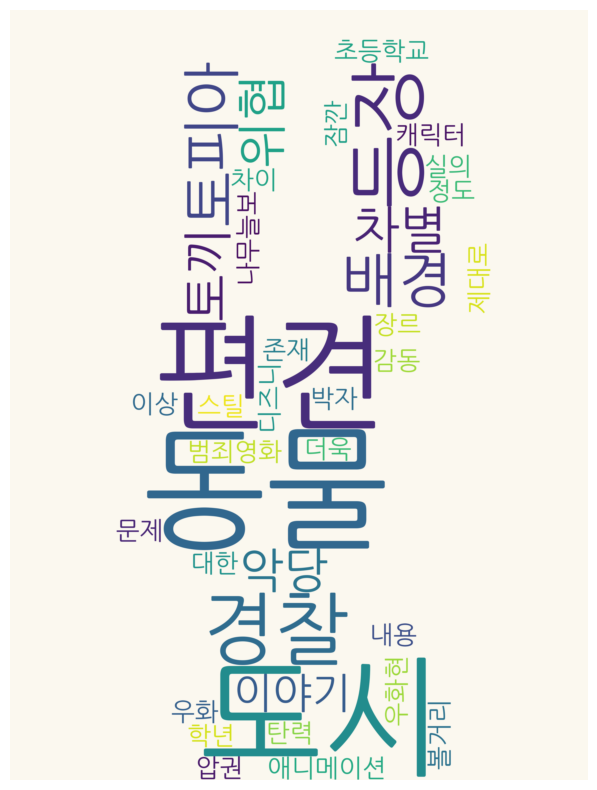

In [ ]:
from wordcloud import WordCloud
from collections import Counter
import numpy as np
from PIL import Image

okt = Okt() #한글 형태소 분석기
nouns = okt.nouns(text)

words=[word for word in nouns if len(word)>1] # 길이가 1인 단어 삭제

word_counts = Counter(words)

mask_image = np.array(Image.open('Mask_judy.png'))

wordcloud = WordCloud(
    font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # 한글
    width=800,
    height=800,
    mask=mask_image, # 마스크 이미지 적용
    #max_font_size=300, # 최대 글씨 크기
    background_color='#FBF8EF', # 배경색
).generate_from_frequencies(word_counts)

# 5. 워드 클라우드 시각화
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
